<a href="https://colab.research.google.com/github/awillett1/a-search-gps/blob/main/GIT_A_search_Amelie_Willett_420_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPS using A* Search

Now we are going to use this algorithm to find the shortest path from a real-life location to another, similar to Google Maps or Waze.

We will be using **Berry College** and **Cloudland Canyon State Park** as examples.

Berry College is located at 34.2888° N, 85.1873° W and Cloudland Canyon is located at 34.8395° N, 85.4840° W.

We are going to plot every possible coordinate from these two locations and narrow it down to find the shortest path possible.

In [ ]:
import requests
import math
import heapq

class City:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon

class Road:
    def __init__(self, name, start_city, end_city, distance, speed, highway):
        self.name = name
        self.start_city = start_city
        self.end_city = end_city
        self.distance = distance # in miles
        self.speed = speed # in mph
        self.highway = highway # name of highway


class Map:
    def __init__(self):
        self.cities = {}
        self.roads = []

    def add_city(self, name, lat, lon):
        self.cities[name] = City(name, lat, lon)

    def add_road(self, name, start_city, end_city, distance, speed, highway):
        self.roads.append(Road(name, start_city, end_city, distance, speed, highway))

    def haversine_distance(self, city1, city2):
        # Calculate the haversine distance between two cities using their latitude and longitude
        lat1, lon1 = math.radians(city1.lat), math.radians(city1.lon)
        lat2, lon2 = math.radians(city2.lat), math.radians(city2.lon)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        # Radius of the Earth in kilometers
        R = 6371.0

        # Calculate the distance in miles
        return R * c * 0.621371  # Convert to miles

    def a_star_search(self, start_city_name, end_city_name):
        # A* search to find the shortest distance between two cities
        start_city = self.cities[start_city_name]
        end_city = self.cities[end_city_name]

        # Priority queue for open list
        open_list = [(0, start_city_name)] # initialization
        came_from = {} # dict to backtrack
        g_score = {city: float('inf') for city in self.cities} # inf. from all other cities but itself (0)
        g_score[start_city_name] = 0
        f_score = {city: float('inf') for city in self.cities} # inf. from all other cities
        f_score[start_city_name] = self.haversine_distance(start_city, end_city) #

        while open_list:
            _, current_city_name = heapq.heappop(open_list)
            current_city = self.cities[current_city_name]

            if current_city_name == end_city_name:
                # Reconstruct the path
                path = [end_city_name]
                while end_city_name in came_from:
                    end_city_name = came_from[end_city_name]
                    path.append(end_city_name)
                return path[::-1]

            for road in self.roads:
                if road.start_city == current_city_name:
                    neighbor_city_name = road.end_city
                elif road.end_city == current_city_name:
                    neighbor_city_name = road.start_city
                else:
                    continue

                # COST
                tentative_g_score = g_score[current_city_name] + road.distance

                if tentative_g_score < g_score[neighbor_city_name]:
                    came_from[neighbor_city_name] = current_city_name
                    g_score[neighbor_city_name] = tentative_g_score
                    f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(
                        self.cities[neighbor_city_name], end_city
                    )
                    heapq.heappush(open_list, (f_score[neighbor_city_name], neighbor_city_name))


        return []  # No path found

    def find_optimal_route(self, start_city_name, end_city_name):
        # Find the optimal route between two cities
        route = self.a_star_search(start_city_name, end_city_name)
        return route

**What is our cost?**

`g_score` -> actual cost from start node to current node
`f_score` -> estimate of total cost from start node to goal node through current node. it is the sum of `g_score` and `h` (heuristic)

```
g_score[neighbor_city_name] = tentative_g_score
f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(
    self.cities[neighbor_city_name], end_city
)
```

`g_score[neighbor_city_name]` -> cost from the start city to the neighbor city along the current path

`f_score[neighbor_city_name]` -> estimated total cost from the start city to the goal city through the neighbor city.

`self.haversine_distance(self.cities[neighbor_city_name], end_city)` provides an estimate of the remaining distance from the neighbor city to the goal city. Adding this estimate to the actual cost `(tentative_g_score)` gives the total estimated cost (`f_score[neighbor_city_name])` for the path.


---



**Updating priority queue based on current best-known path..**.

**Check if the tentative g_score is better than the current g_score for the neighbor city:**
`if tentative_g_score < g_score[neighbor_city_name]:`
checks whether the path from the start city to the current neighbor city through the current node `(current_city_name)` has a lower cost `(tentative_g_score)` than the previously recorded cost `(g_score[neighbor_city_name])`. If it is, it means that the new path is more efficient.

**Update came_from, g_score, and f_score for the neighbor city:**
```
came_from[neighbor_city_name] = current_city_name
g_score[neighbor_city_name] = tentative_g_score
f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(
    self.cities[neighbor_city_name], end_city
)
```
`came_from[neighbor_city_name] = current_city_name:` This records that the best-known path to the neighbor city is now through the current node ``(current_city_name)`.

`g_score[neighbor_city_name] = tentative_g_score`: This updates the cost of the best-known path from the start city to the neighbor city.

`f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(self.cities[neighbor_city_name], end_city)`: This updates the total estimated cost of the best-known path from the start city to the goal city through the neighbor city. It is the sum of the actual cost `(tentative_g_score)` and the heuristic estimate of the remaining distance to the goal city.

**Add the neighbor city to the priority queue with its updated `f_score`**
```
heapq.heappush(open_list, (f_score[neighbor_city_name], neighbor_city_name))
```
adds the neighbor city to the priority queue `(open_list)` with its new estimated total cost `(f_score)`. the priority queue is used to prioritize exploring nodes with lower estimated total costs.

e1e45776-aa40-4806-820e-b5c5b8050f4b_SP+687+-+The+haversine+formula.avifWhy use Haversine Distance as the heuristic?


*   calculates the distance between two points on a sphere
*   latitude and longitude to find shortest distance


like what we're doing here :)



# Processing Git Data

In [ ]:
# Taken from thekaranacharya road-trip-planner project on GitHub, you should only need to run this once if this doesn't show up in "Files"

# cities
!wget https://raw.githubusercontent.com/thekaranacharya/road-trip-planner/main/city-gps.txt

with open('city-gps.txt', 'r') as file:
    city_gps_db = file.read()

!wget https://raw.githubusercontent.com/thekaranacharya/road-trip-planner/main/road-segments.txt

with open('road-segments.txt', 'r') as file:
    road_db = file.read()



--2023-11-29 23:21:23--  https://raw.githubusercontent.com/thekaranacharya/road-trip-planner/main/city-gps.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236041 (231K) [text/plain]
Saving to: ‘city-gps.txt’

city-gps.txt        100%[===================>] 230.51K  --.-KB/s    in 0.1s    

2023-11-29 23:21:24 (1.79 MB/s) - ‘city-gps.txt’ saved [236041/236041]

--2023-11-29 23:21:24--  https://raw.githubusercontent.com/thekaranacharya/road-trip-planner/main/road-segments.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 662364

In [ ]:
# Create a Map object
map = Map()

# Parse the road database
road_segments = road_db.split('\n')

for line in road_segments:
    if line:
        data = line.split()
        if len(data) == 5:
            start_city_name = data[0].replace("_", " ")
            end_city_name = data[1].replace("_", " ")
            distance = int(data[2])
            speed = int(data[3])
            highway = data[4]

            # Check if the cities already exist in the map, if not, add them
            if start_city_name not in map.cities:
                map.add_city(start_city_name, 0, 0)  # You can set latitude and longitude as needed
            if end_city_name not in map.cities:
                map.add_city(end_city_name, 0, 0)  # You can set latitude and longitude as needed

            # Add the road to the map
            map.add_road(highway, start_city_name, end_city_name, distance, speed, highway)

# Update City objects in the Map with latitude and longitude
city_gps_data = city_gps_db.split('\n')

for line in city_gps_data:
    if line:
        data = line.split()
        if len(data) == 3:
            city_name = data[0].replace("_", " ")
            latitude = float(data[1])
            longitude = float(data[2])

            # Check if the city already exists in the map, and if it does, update its latitude and longitude
            if city_name in map.cities:
                map.cities[city_name].lat = latitude
                map.cities[city_name].lon = longitude

# Map Graph

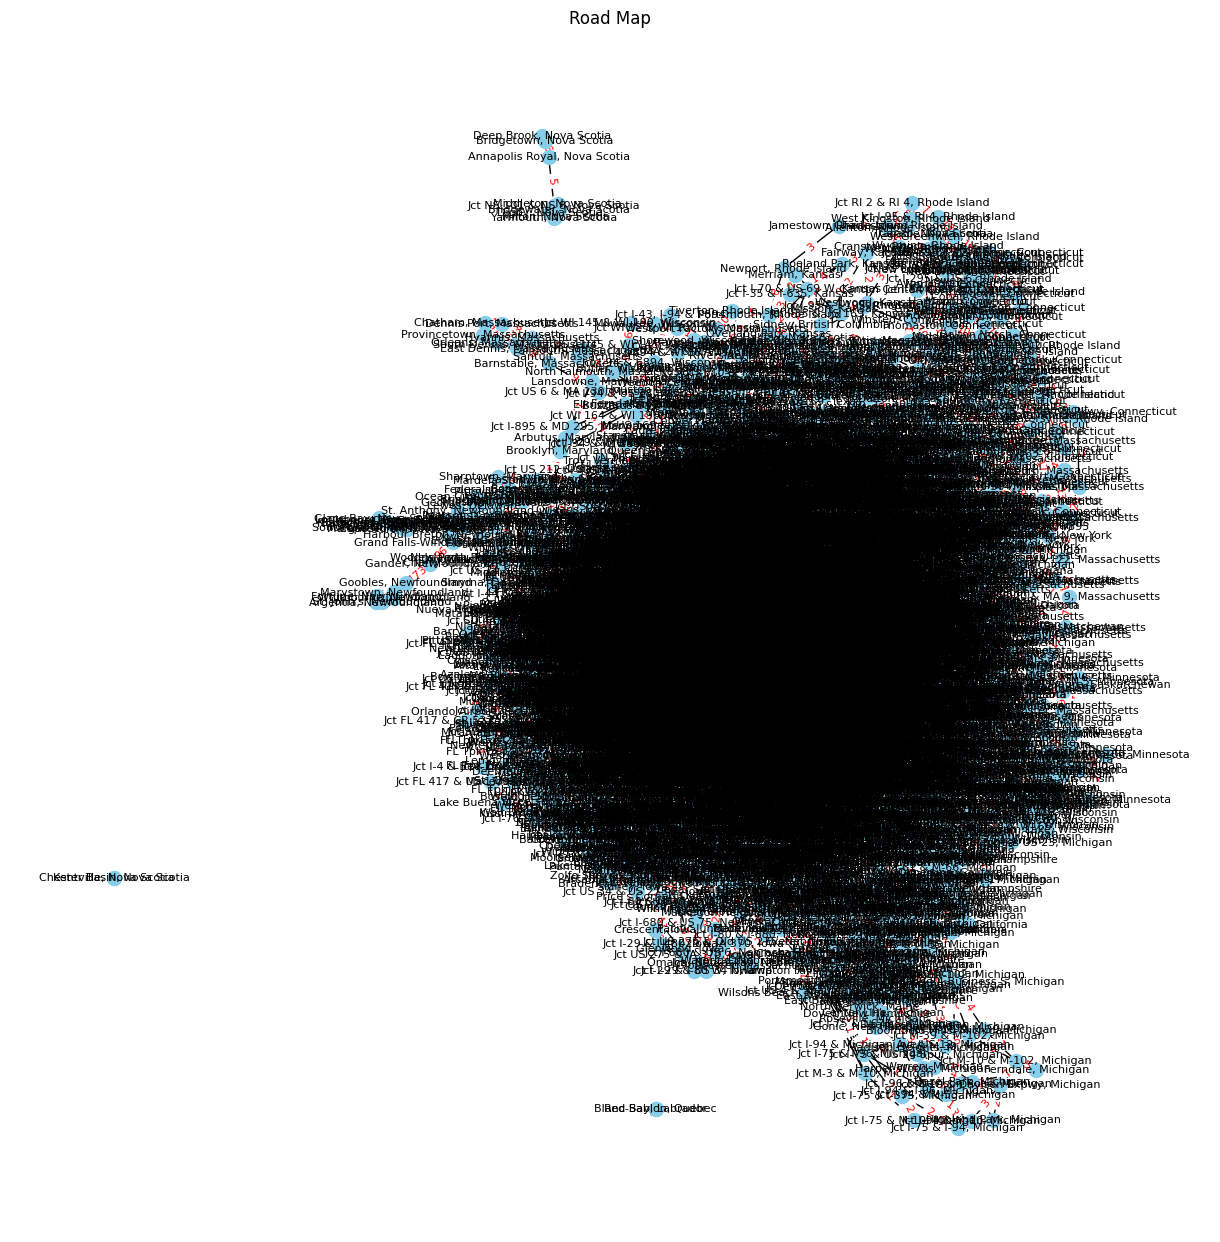

In [ ]:

import networkx as nx
import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes (cities) to the graph
for city_name, city in map.cities.items():
    G.add_node(city_name)

# Add edges (roads) to the graph
for road in map.roads:
    G.add_edge(road.start_city, road.end_city, weight=road.distance)

# Use spring layout to position the cities
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_color='red')
plt.title("Road Map")
plt.axis('off')

# Display the graph
plt.show()


This is very gross and confusing to look at (ew many points) and so let's find some specific cities and test the routes out there!

# Subgraphs and Examples

Here, we create a function for a subgraph which takes the `optimal_route` and creates a smaller graph only including the cities and roads included in the `optimal_route`.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a subgraph from the main graph containing specific cities and roads
def create_subgraph(graph, optimal_route):
    # Initialize the subgraph
    subgraph = nx.Graph()

    # Add nodes (cities) to the subgraph from the optimal route
    subgraph.add_nodes_from(optimal_route)

    # Add edges (roads) to the subgraph
    for road in graph.edges:
        if road[0] in optimal_route and road[1] in optimal_route:
            subgraph.add_edge(road[0], road[1], weight=graph[road[0]][road[1]]['weight'])

    return subgraph

Example 1: Bowdon, North Dakota (`start`) to Franklin, Tennessee (`end`).

Optimal Route:
City Name: Bowdon, North Dakota
Road Name: US_71/270

City Name: Carrington, North Dakota
Road Name: US_71

City Name: Jamestown, North Dakota
Road Name: US_270

City Name: Sanborn, North Dakota
Road Name: ME_16

City Name: Valley City, North Dakota
Road Name: ME_6/15/16

City Name: West Fargo, North Dakota
Road Name: ME_6/15

City Name: Fargo, North Dakota
Road Name: WI_29

City Name: Moorhead, Minnesota
Road Name: WI_13

City Name: Glyndon, Minnesota
Road Name: WI_13

City Name: Winnipeg Junction, Minnesota
Road Name: WI_29

City Name: Detroit Lakes, Minnesota
Road Name: US_56

City Name: Wadena, Minnesota
Road Name: NM_39

City Name: Motley, Minnesota
Road Name: US_56

City Name: Little Falls, Minnesota
Road Name: KS_14

City Name: Sauk Rapids, Minnesota
Road Name: KS_14

City Name: Big Lake, Minnesota
Road Name: US_50

City Name: Elk River, Minnesota
Road Name: US_50

City Name: Anoka, Minnesota
Road Name: MS_25

City Name: Osseo, Minnesota
Road Name: US_45

City Nam

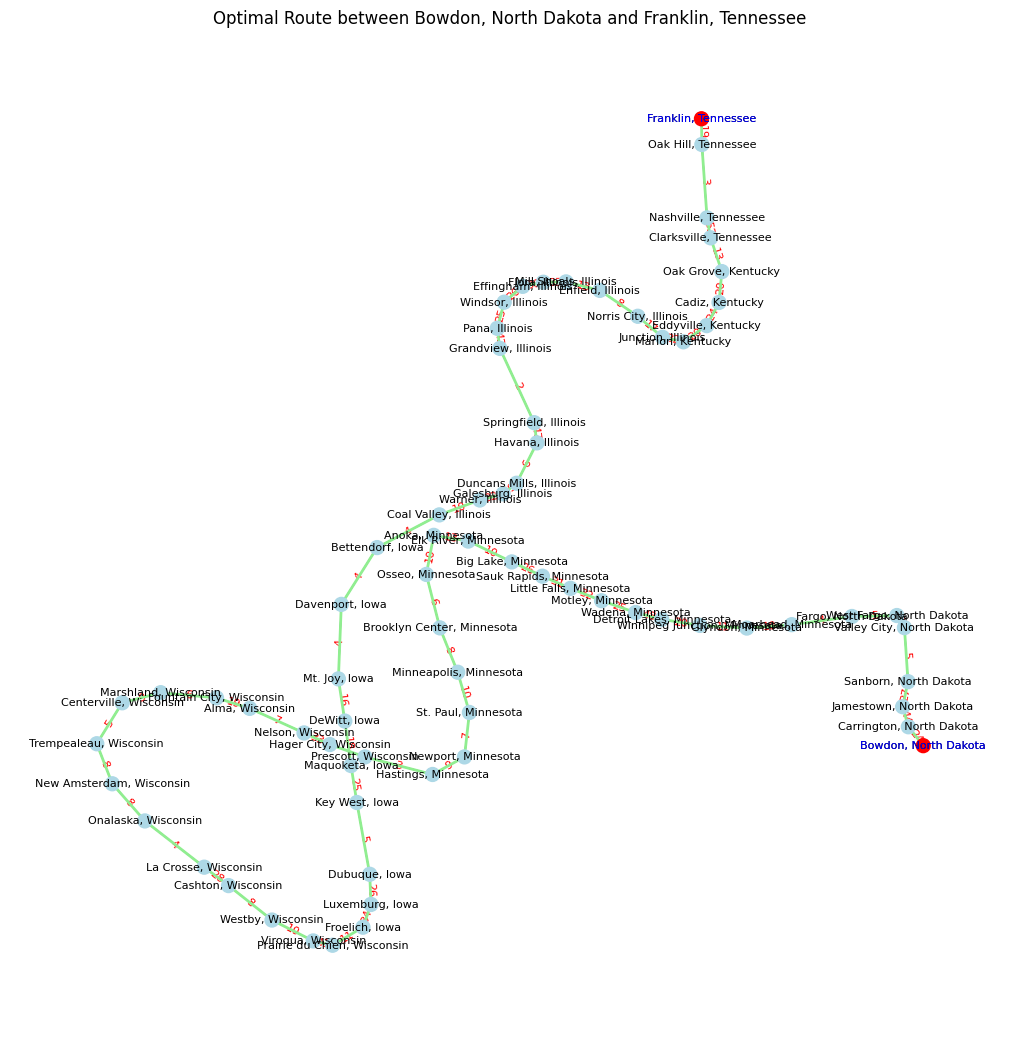

In [ ]:
start = "Bowdon, North Dakota"
end = "Franklin, Tennessee"


optimal_route = map.find_optimal_route(start, end)
if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")
# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

This makes visits through multiple cities/states, but not too many where the graph becomes overwhelming.

Example 2: Rome, Georgia (`start`) to Chattanooga, Tennessee (`end`).

Optimal Route:
City Name: Rome, Georgia
Road Name: US_71/270

City Name: Chattanooga, Tennessee
Road Name: US_71



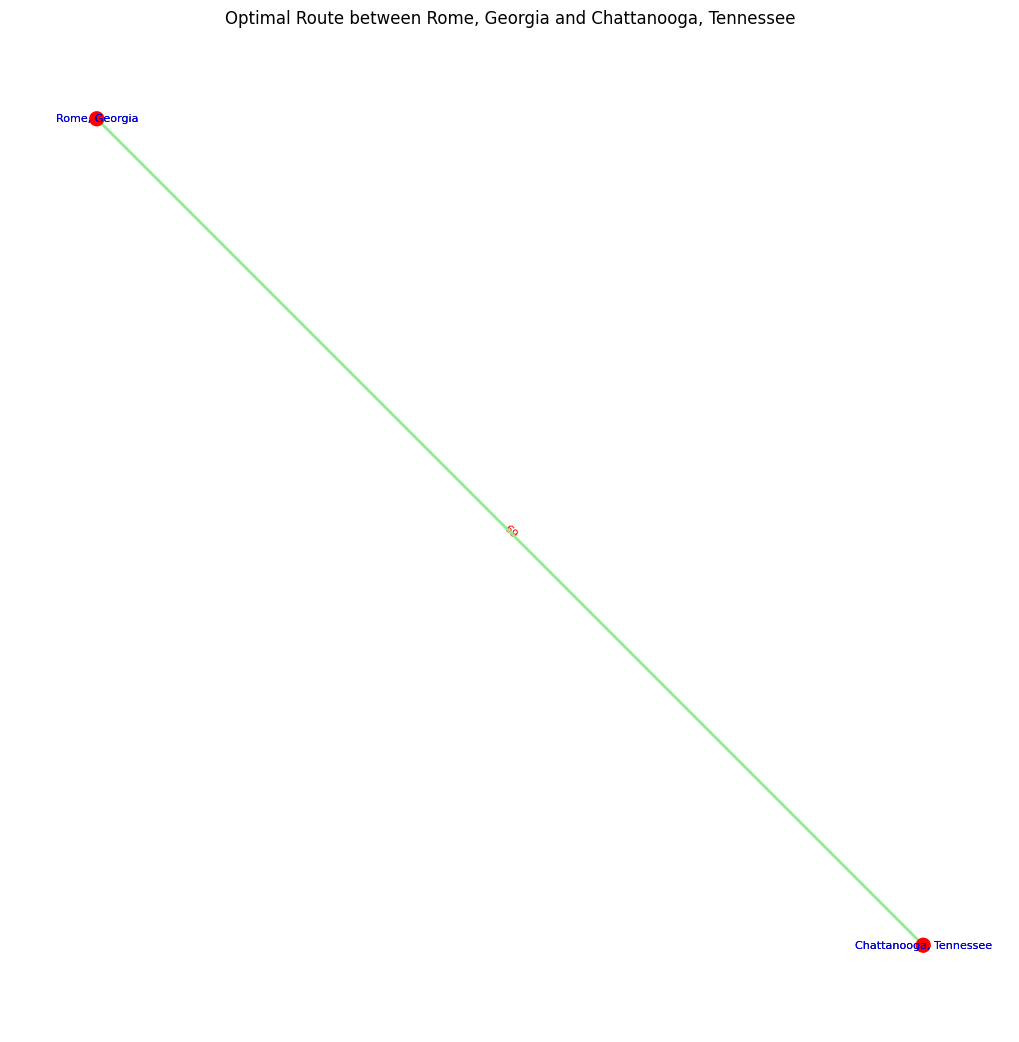

In [ ]:
start = "Rome, Georgia"
end = "Chattanooga, Tennessee"

optimal_route = map.find_optimal_route(start, end)

if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")

# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

Short and sweet! Rome has a direct route to Chattanooga so it makes it easy :) Now how about a more difficult one.

Optimal Route:
City Name: Death Valley Junction, California
Road Name: US_71/270

City Name: Amargosa Valley, Nevada
Road Name: US_71

City Name: Las Vegas, Nevada
Road Name: US_270

City Name: St. George, Utah
Road Name: ME_16

City Name: Fredonia, Arizona
Road Name: ME_6/15/16

City Name: Kanab, Utah
Road Name: ME_6/15

City Name: Page, Arizona
Road Name: WI_29

City Name: Kayenta, Arizona
Road Name: WI_13

City Name: Mexican Water, Arizona
Road Name: WI_13

City Name: Teec Nos Pas, Arizona
Road Name: WI_29

City Name: Ute Mountain Reservation, Colorado
Road Name: US_56

City Name: Cortez, Colorado
Road Name: NM_39

City Name: Durango, Colorado
Road Name: US_56

City Name: Pagosa Springs, Colorado
Road Name: KS_14

City Name: South Fork, Colorado
Road Name: KS_14

City Name: Del Norte, Colorado
Road Name: US_50

City Name: Monte Vista, Colorado
Road Name: US_50

City Name: Alamosa, Colorado
Road Name: MS_25

City Name: Fort Garland, Colorado
Road Name: US_45

City Name: Walsenburg, C

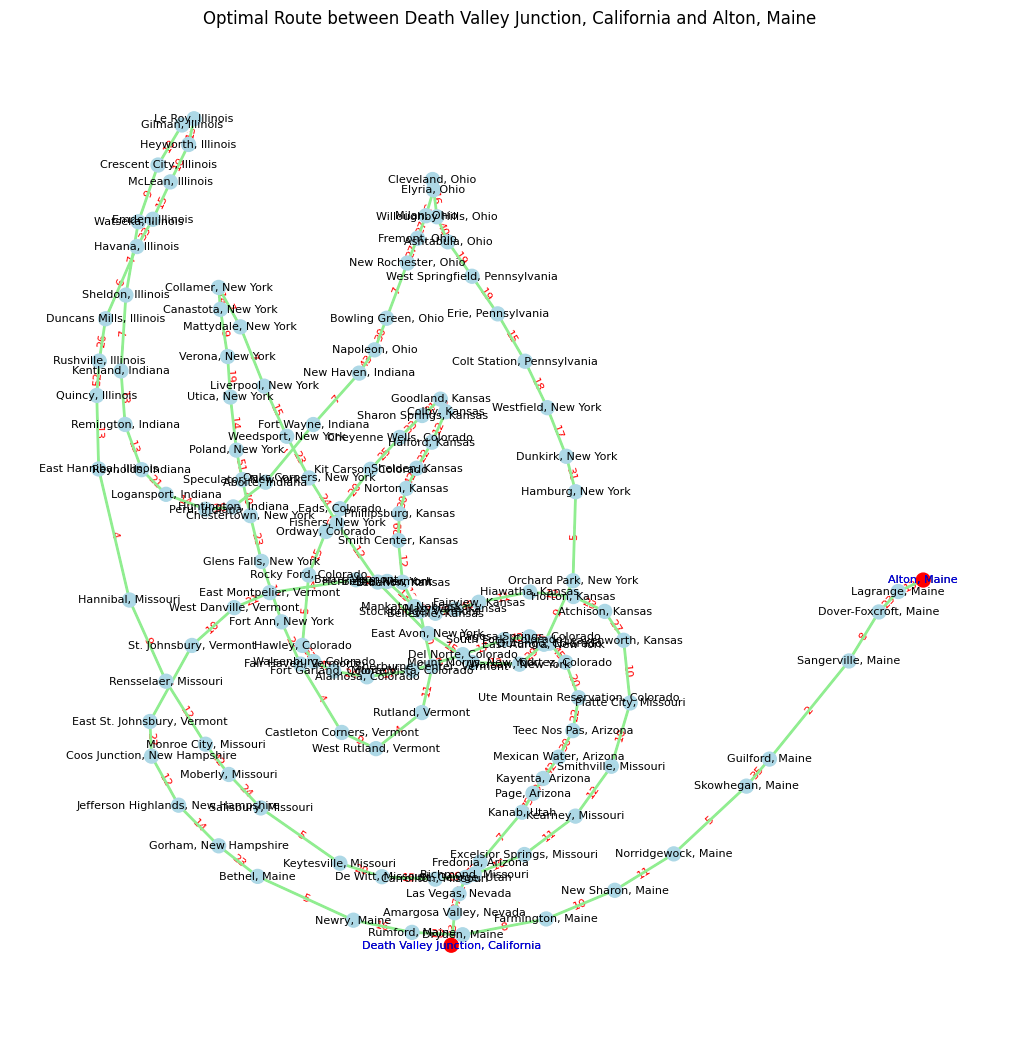

In [ ]:
start = "Death Valley Junction, California"
end = "Alton, Maine"

optimal_route = map.find_optimal_route(start, end)

if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")


# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

This one goes across the country from the West Coast (California, `start`) to the East Coast (Maine, `end`)! It goes through many states and cities to reach its ultimate destination. :3

Optimal Route:
City Name: Rome, Georgia
Road Name: US_71/270

City Name: Calhoun, Georgia
Road Name: US_71

City Name: Dalton, Georgia
Road Name: US_270

City Name: Chatsworth, Georgia
Road Name: ME_16

City Name: Ocoee, Tennessee
Road Name: ME_6/15/16

City Name: Englewood, Tennessee
Road Name: ME_6/15

City Name: Maryville, Tennessee
Road Name: WI_29

City Name: Sevierville, Tennessee
Road Name: WI_13

City Name: Newport, Tennessee
Road Name: WI_13

City Name: Greeneville, Tennessee
Road Name: WI_29

City Name: Johnson City, Tennessee
Road Name: US_56

City Name: Bristol, Tennessee
Road Name: NM_39

City Name: Mountain City, Tennessee
Road Name: US_56

City Name: Damascus, Virginia
Road Name: KS_14

City Name: Abingdon, Virginia
Road Name: KS_14

City Name: Wytheville, Virginia
Road Name: US_50

City Name: Fort Chiswell, Virginia
Road Name: US_50

City Name: Dublin, Virginia
Road Name: MS_25

City Name: Christiansburg, Virginia
Road Name: US_45

City Name: Roanoke, Virginia
Road Name

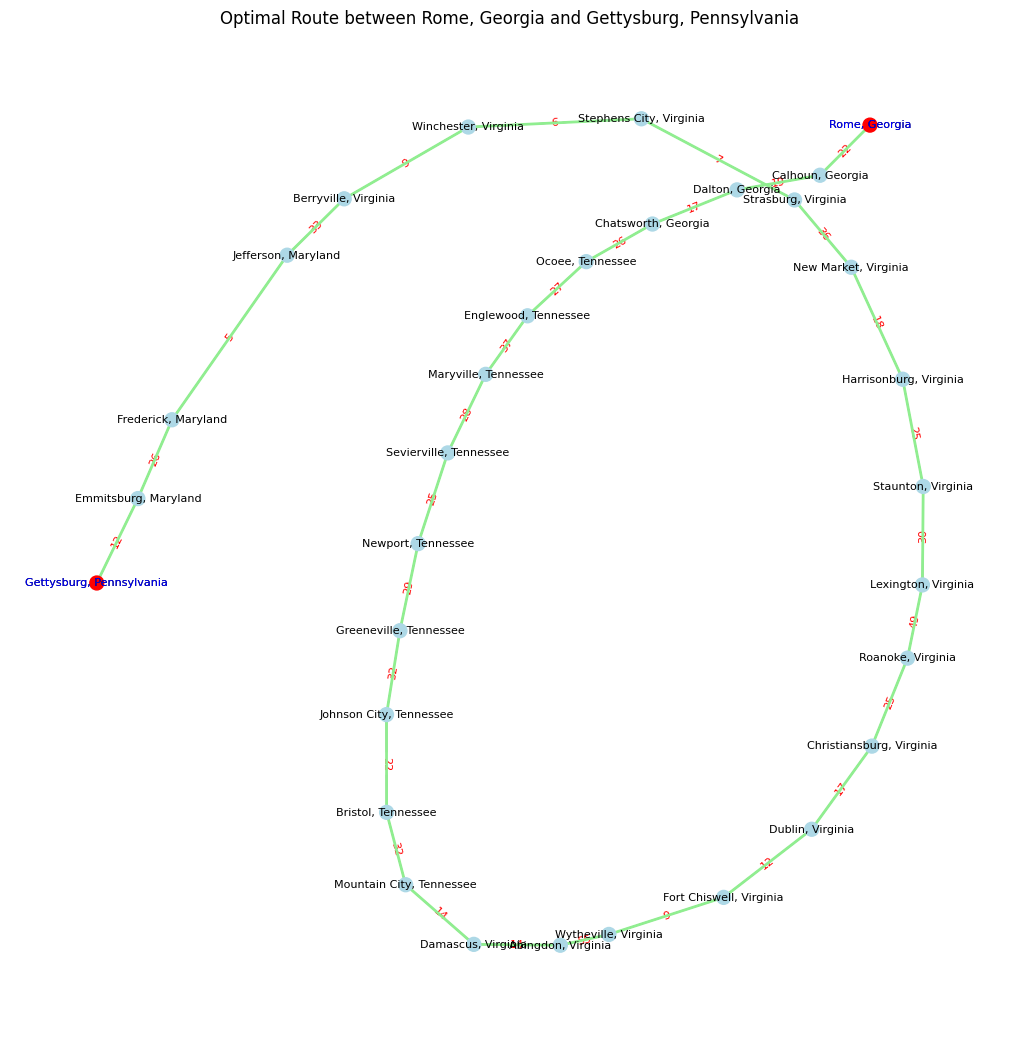

In [ ]:
start = "Rome, Georgia"
end = "Gettysburg, Pennsylvania"

optimal_route = map.find_optimal_route(start, end)

if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")


# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

Optimal Route:
City Name: Alma, Arkansas
Road Name: US_71/270

City Name: Russellville, Arkansas
Road Name: US_71



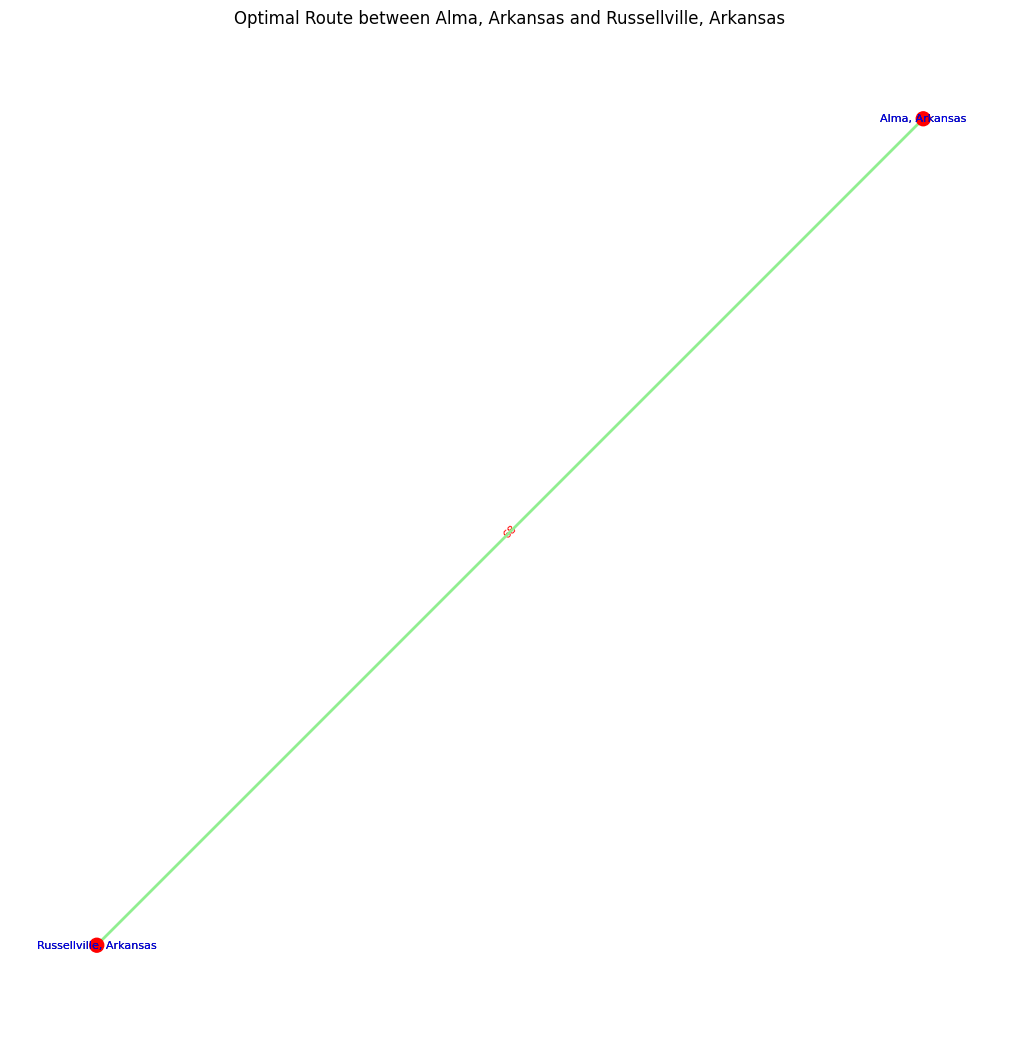

In [ ]:
start = "Alma, Arkansas"
end = "Russellville, Arkansas"

optimal_route = map.find_optimal_route(start, end)

if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")


# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

# Avoiding Highways

Let's do a version of our A* Search algorithm that avoids roads over a 50 mph speed limit (assuming it is a highway)

In [ ]:
class Map:
    def __init__(self):
        self.cities = {}
        self.roads = []

    def add_city(self, name, lat, lon):
        self.cities[name] = City(name, lat, lon)

    def add_road(self, name, start_city, end_city, distance, speed, highway):
        self.roads.append(Road(name, start_city, end_city, distance, speed, highway))

    def haversine_distance(self, city1, city2):
        # Calculate the haversine distance between two cities using their latitude and longitude
        lat1, lon1 = math.radians(city1.lat), math.radians(city1.lon)
        lat2, lon2 = math.radians(city2.lat), math.radians(city2.lon)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        # Radius of the Earth in kilometers
        R = 6371.0

        # Calculate the distance in miles
        return R * c * 0.621371  # Convert to miles

    def a_star_search_avoid_highways(self, start_city_name, end_city_name, max_speed=50):
        # A* search to find the shortest distance between two cities, considering roads under a maximum speed limit
        start_city = self.cities[start_city_name]
        end_city = self.cities[end_city_name]

        # Priority queue for open list
        open_list = [(0, start_city_name)]
        came_from = {}
        g_score = {city: float('inf') for city in self.cities}
        g_score[start_city_name] = 0
        f_score = {city: float('inf') for city in self.cities}
        f_score[start_city_name] = self.haversine_distance(start_city, end_city)

        while open_list:
            _, current_city_name = heapq.heappop(open_list)
            current_city = self.cities[current_city_name]

            if current_city_name == end_city_name:
                # Reconstruct the path
                path = [end_city_name]
                while end_city_name in came_from:
                    end_city_name = came_from[end_city_name]
                    path.append(end_city_name)
                return path[::-1]

            for road in self.roads:
                if road.start_city == current_city_name:
                    neighbor_city_name = road.end_city
                elif road.end_city == current_city_name:
                    neighbor_city_name = road.start_city
                else:
                    continue

                # Consider only roads with speed limit under the specified maximum speed
                if road.speed < max_speed:
                    # COST
                    tentative_g_score = g_score[current_city_name] + road.distance

                    if tentative_g_score < g_score[neighbor_city_name]:
                        came_from[neighbor_city_name] = current_city_name
                        g_score[neighbor_city_name] = tentative_g_score
                        f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(
                            self.cities[neighbor_city_name], end_city
                        )
                        heapq.heappush(open_list, (f_score[neighbor_city_name], neighbor_city_name))

        return []  # No path found

    def find_optimal_route_max_speed(self, start_city_name, end_city_name, max_speed):
        # Find the optimal route between two cities considering roads under a maximum speed limit
        route = self.a_star_search_avoid_highways(start_city_name, end_city_name, max_speed)
        return route

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create a subgraph from the main graph containing specific cities and roads
def create_subgraph_max_speed(graph, optimal_route, max_speed=50):
    # Initialize the subgraph
    subgraph = nx.Graph()

    # Add nodes (cities) to the subgraph from the optimal route
    subgraph.add_nodes_from(optimal_route)

    # Add edges (roads) to the subgraph
    for road in graph.edges:
        if road[0] in optimal_route and road[1] in optimal_route:
            # Consider only roads with speed limit under the specified maximum speed
            if graph[road[0]][road[1]]['speed'] <= max_speed:
                subgraph.add_edge(road[0], road[1], weight=graph[road[0]][road[1]]['distance'])

    return subgraph

In [ ]:
# Create a new Map object
new_map = Map()

# Parse the road database
road_segments = road_db.split('\n')

for line in road_segments:
    if line:
        data = line.split()
        if len(data) == 5:
            start_city_name = data[0].replace("_", " ")
            end_city_name = data[1].replace("_", " ")
            distance = int(data[2])
            speed = int(data[3])
            highway = data[4]

            # Check if the cities already exist in the new map, if not, add them
            if start_city_name not in new_map.cities:
                new_map.add_city(start_city_name, 0, 0)  # You can set latitude and longitude as needed
            if end_city_name not in new_map.cities:
                new_map.add_city(end_city_name, 0, 0)  # You can set latitude and longitude as needed

            # Add the road to the new map
            new_map.add_road(highway, start_city_name, end_city_name, distance, speed, highway)

# Update City objects in the new Map with latitude and longitude
city_gps_data = city_gps_db.split('\n')

for line in city_gps_data:
    if line:
        data = line.split()
        if len(data) == 3:
            city_name = data[0].replace("_", " ")
            latitude = float(data[1])
            longitude = float(data[2])

            # Check if the city already exists in the new map, and if it does, update its latitude and longitude
            if city_name in new_map.cities:
                new_map.cities[city_name].lat = latitude
                new_map.cities[city_name].lon = longitude

Optimal Route:
City Name: Rome, Georgia
Speed: 40
Road Name: US_71/270

City Name: Cedartown, Georgia
Speed: 40
Road Name: US_71

City Name: Piedmont, Alabama
Speed: 40
Road Name: US_270

City Name: Oxford, Alabama
Speed: 40
Road Name: ME_16

City Name: Opelika, Alabama
Speed: 40
Road Name: ME_6/15/16

City Name: Crawford, Alabama
Speed: 40
Road Name: ME_6/15

City Name: Columbus, Georgia
Speed: 40
Road Name: WI_29

City Name: Butler, Georgia
Speed: 40
Road Name: WI_13

City Name: Fort Valley, Georgia
Speed: 40
Road Name: WI_13

City Name: Perry, Georgia
Speed: 40
Road Name: WI_29

City Name: Eastman, Georgia
Speed: 40
Road Name: US_56

City Name: McRae, Georgia
Speed: 40
Road Name: NM_39

City Name: Dublin, Georgia
Speed: 40
Road Name: US_56

City Name: Bartow, Georgia
Speed: 40
Road Name: KS_14

City Name: Louisville, Georgia
Speed: 40
Road Name: KS_14

City Name: Wrens, Georgia
Speed: 40
Road Name: US_50

City Name: Appling, Georgia
Speed: 40
Road Name: US_50

City Name: Clarks Hill

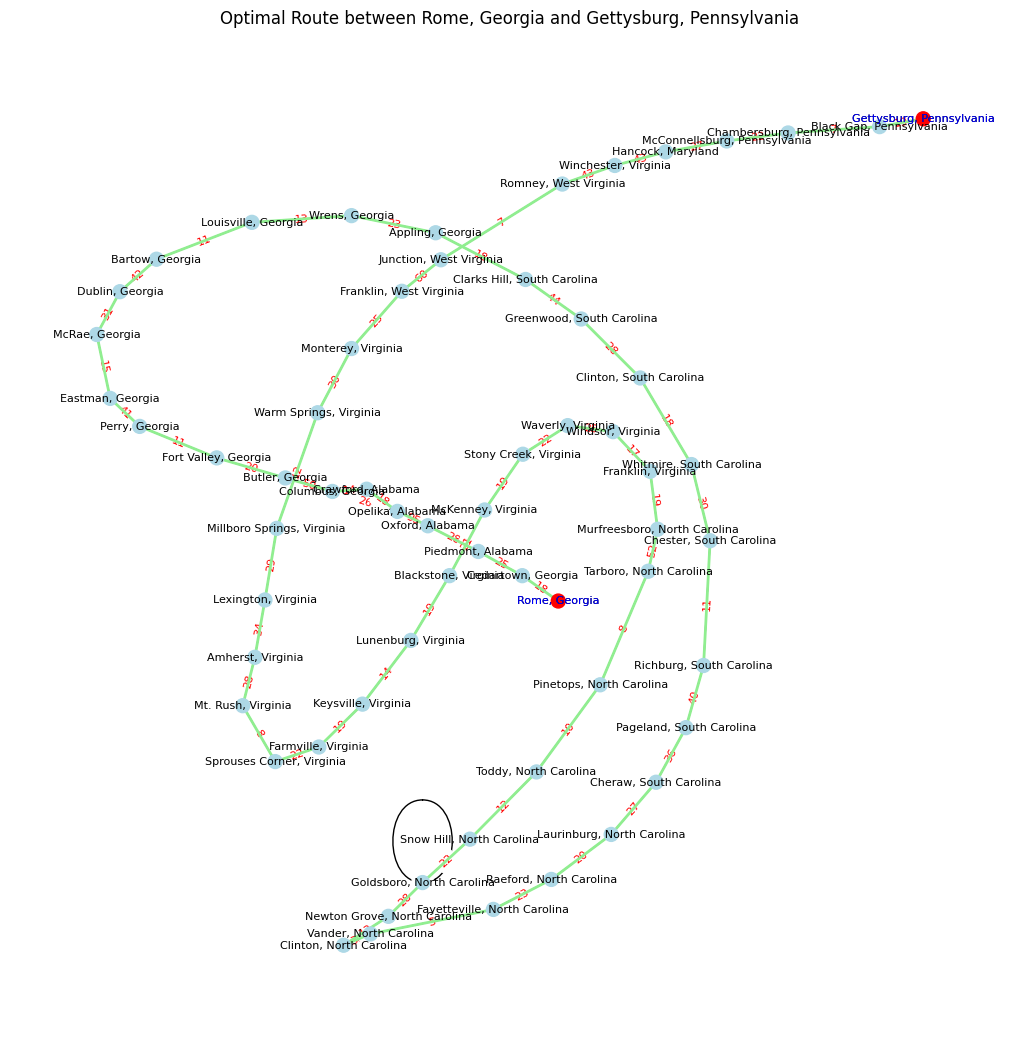

In [ ]:
# Use the a_star_search_avoid_low_speed method in the main code
start = "Rome, Georgia"
end = "Gettysburg, Pennsylvania"

optimal_route = new_map.find_optimal_route_max_speed(start, end, 50)

if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = new_map.cities[city_name]  # Get the City object
        road_name = new_map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Speed:", speed)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")


# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

# Comparison with other Softwares


**Pros of my `a_star_search`:**
*   Can be adjusted/modified based on needs (highway avoiding, only highways, etc.)
*   Can theoretically be used offline because it doesn't use any real time updates
* Simple to use/understand

**Cons of my `a_star_search`:**
*   Does not capture all possible roads from database (limited)
*   Does not have a lot of
*   Initial intake of data takes a long time (map graph, around 5 minutes).
*   Could only run on PC

**Pros of Google Maps:**
*   Real time data (traffic, satellites)
*   More information available (lots of roads/highways collected)
*   Can be used on many different kinds of devices (iOS, PC, Android, etc.)
*   Lots of features

**Cons of Google Maps:**
*  Requires constant internet source
*  Privacy / data collection
*  Far more complex (not necessarily a con but)







# Comparing Time instead of Distance

We have been using distance for computing A* Search. Let's use time considering the speed limits of each road.


Time = Distance/Speed

`(road.distance / road.speed)`

In [ ]:
import requests
import math
import heapq

class City:
    def __init__(self, name, lat, lon):
        self.name = name
        self.lat = lat
        self.lon = lon

class Road:
    def __init__(self, name, start_city, end_city, distance, speed, highway):
        self.name = name
        self.start_city = start_city
        self.end_city = end_city
        self.distance = distance  # in miles
        self.speed = speed  # in mph
        self.highway = highway  # name of highway

class Map:
    def __init__(self):
        self.cities = {}
        self.roads = []

    def add_city(self, name, lat, lon):
        self.cities[name] = City(name, lat, lon)

    def add_road(self, name, start_city, end_city, distance, speed, highway):
        self.roads.append(Road(name, start_city, end_city, distance, speed, highway))

    def haversine_distance(self, city1, city2):
        # Calculate the haversine distance between two cities using their latitude and longitude
        lat1, lon1 = math.radians(city1.lat), math.radians(city1.lon)
        lat2, lon2 = math.radians(city2.lat), math.radians(city2.lon)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

        # Radius of the Earth in kilometers
        R = 6371.0

        # Calculate the distance in miles
        return R * c * 0.621371  # Convert to miles

    def a_star_search(self, start_city_name, end_city_name):
        # A* search to find the shortest time between two cities based on speed limits
        start_city = self.cities[start_city_name]
        end_city = self.cities[end_city_name]

        # Priority queue for open list
        open_list = [(0, start_city_name)]  # initialization
        came_from = {}  # dict to backtrack
        g_score = {city: float('inf') for city in self.cities}  # inf. from all other cities but itself (0)
        g_score[start_city_name] = 0
        f_score = {city: float('inf') for city in self.cities}  # inf. from all other cities
        f_score[start_city_name] = self.haversine_distance(start_city, end_city)  #

        while open_list:
            _, current_city_name = heapq.heappop(open_list)
            current_city = self.cities[current_city_name]

            if current_city_name == end_city_name:
                # Reconstruct the path
                path = [end_city_name]
                while end_city_name in came_from:
                    end_city_name = came_from[end_city_name]
                    path.append(end_city_name)
                return path[::-1]

            for road in self.roads:
                if road.start_city == current_city_name:
                    neighbor_city_name = road.end_city
                elif road.end_city == current_city_name:
                    neighbor_city_name = road.start_city
                else:
                    continue

                # COST
                tentative_g_score = g_score[current_city_name]

                if tentative_g_score < g_score[neighbor_city_name]:
                    came_from[neighbor_city_name] = current_city_name
                    g_score[neighbor_city_name] = tentative_g_score
                    f_score[neighbor_city_name] = tentative_g_score + self.haversine_distance(
                        self.cities[neighbor_city_name], end_city
                    )
                    heapq.heappush(open_list, (f_score[neighbor_city_name], neighbor_city_name))

        return []  # No path found

    def find_optimal_route(self, start_city_name, end_city_name):
        # Find the optimal route between two cities based on time to travel
        route = self.a_star_search(start_city_name, end_city_name)
        return route


In [ ]:
# Create a Map object
map = Map()

# Parse the road database
road_segments = road_db.split('\n')

for line in road_segments:
    if line:
        data = line.split()
        if len(data) == 5:
            start_city_name = data[0].replace("_", " ")
            end_city_name = data[1].replace("_", " ")
            distance = int(data[2])
            speed = int(data[3])
            highway = data[4]

            # Check if the cities already exist in the map, if not, add them
            if start_city_name not in map.cities:
                map.add_city(start_city_name, 0, 0)  # You can set latitude and longitude as needed
            if end_city_name not in map.cities:
                map.add_city(end_city_name, 0, 0)  # You can set latitude and longitude as needed

            # Add the road to the map
            map.add_road(highway, start_city_name, end_city_name, distance, speed, highway)

# Update City objects in the Map with latitude and longitude
city_gps_data = city_gps_db.split('\n')

for line in city_gps_data:
    if line:
        data = line.split()
        if len(data) == 3:
            city_name = data[0].replace("_", " ")
            latitude = float(data[1])
            longitude = float(data[2])

            # Check if the city already exists in the map, and if it does, update its latitude and longitude
            if city_name in map.cities:
                map.cities[city_name].lat = latitude
                map.cities[city_name].lon = longitude

Optimal Route:
City Name: Bowdon, North Dakota
Road Name: US_71/270

City Name: Carrington, North Dakota
Road Name: US_71

City Name: Jamestown, North Dakota
Road Name: US_270

City Name: Edgeley, North Dakota
Road Name: ME_16

City Name: Barnard, South Dakota
Road Name: ME_6/15/16

City Name: Aberdeen, South Dakota
Road Name: ME_6/15

City Name: Redfield, South Dakota
Road Name: WI_29

City Name: Wolsey, South Dakota
Road Name: WI_13

City Name: Lane, South Dakota
Road Name: WI_13

City Name: Plankinton, South Dakota
Road Name: WI_29

City Name: Mitchell, South Dakota
Road Name: US_56

City Name: Salem, South Dakota
Road Name: NM_39

City Name: Humboldt, South Dakota
Road Name: US_56

City Name: Parker, South Dakota
Road Name: KS_14

City Name: Lennox, South Dakota
Road Name: KS_14

City Name: Worthing, South Dakota
Road Name: US_50

City Name: Perkins, Iowa
Road Name: US_50

City Name: LeMars, Iowa
Road Name: MS_25

City Name: Cherokee, Iowa
Road Name: US_45

City Name: Holstein, Iow

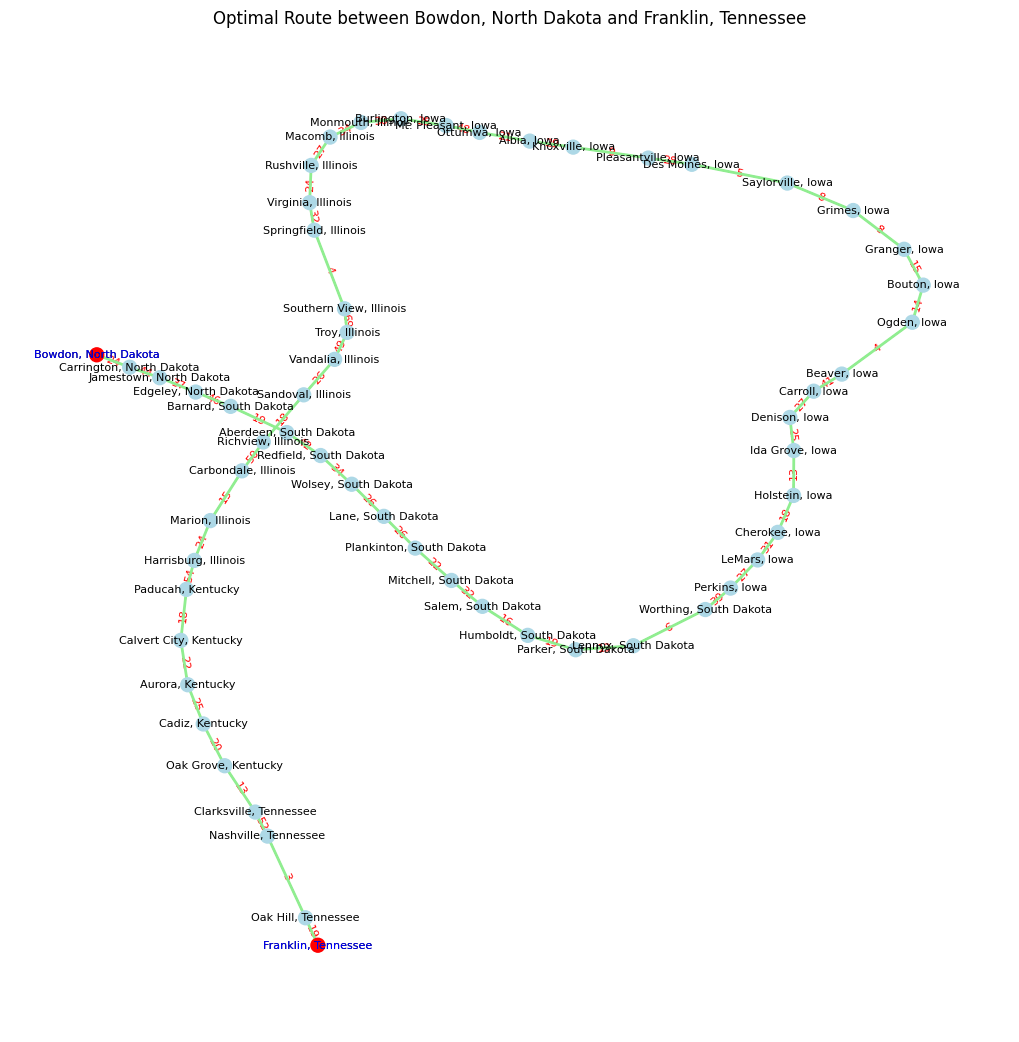

In [ ]:
start = "Bowdon, North Dakota"
end = "Franklin, Tennessee"


optimal_route = map.find_optimal_route(start, end)
if optimal_route:
    print("Optimal Route:")
    for i, city_name in enumerate(optimal_route):
        city = map.cities[city_name]  # Get the City object
        road_name = map.roads[i].name  # Get the road name corresponding to the current city

        print("City Name:", city_name)
        print("Road Name:", road_name)
        print()
else:
    print(f"No route found between {start} and {end}")
# Create a subgraph containing only the relevant cities and roads
subgraph = create_subgraph(G, optimal_route)

# Define different colors for the start and end cities
node_colors = ['lightblue' if node != start and node != end else 'red' for node in subgraph.nodes]

# Draw the subgraph
pos = nx.spring_layout(subgraph)
plt.figure(figsize=(10, 10))

# Draw the subgraph with node colors
nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color=node_colors, font_size=8, font_color='black')
labels = nx.get_edge_attributes(subgraph, 'weight')
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, font_color='red')

# Highlight the optimal route
if optimal_route:
    optimal_edges = [(optimal_route[i], optimal_route[i + 1]) for i in range(len(optimal_route) - 1)]
    nx.draw_networkx_edges(subgraph, pos, edgelist=optimal_edges, edge_color='lightgreen', width=2)

# Label the start and end cities in different colors
nx.draw_networkx_labels(subgraph, pos, labels={start: start, end: end}, font_size=8, font_color='blue')

plt.title(f"Optimal Route between {start} and {end}")
plt.axis('off')

# Display the graph
plt.show()

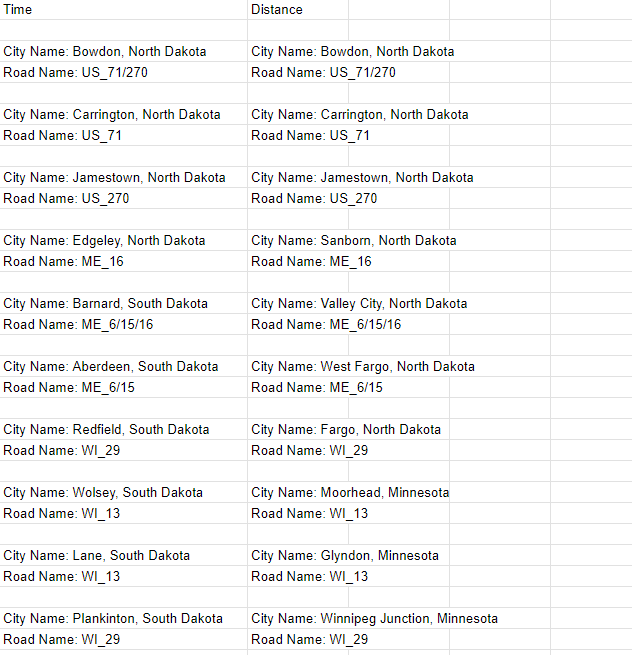

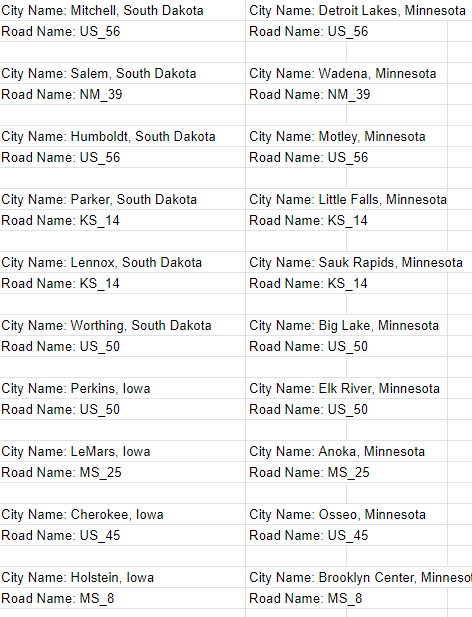

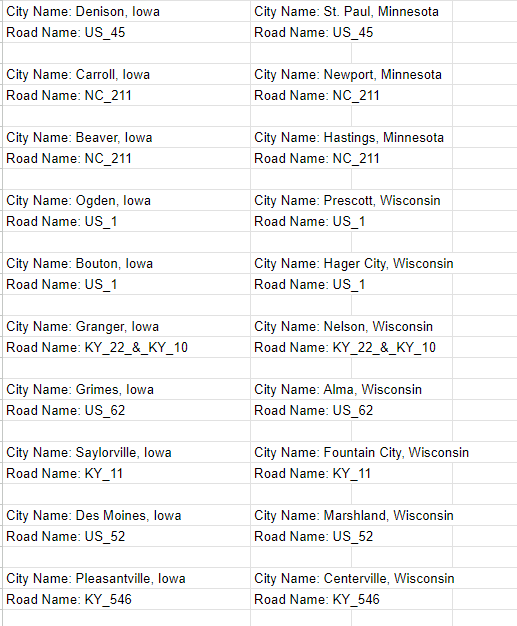

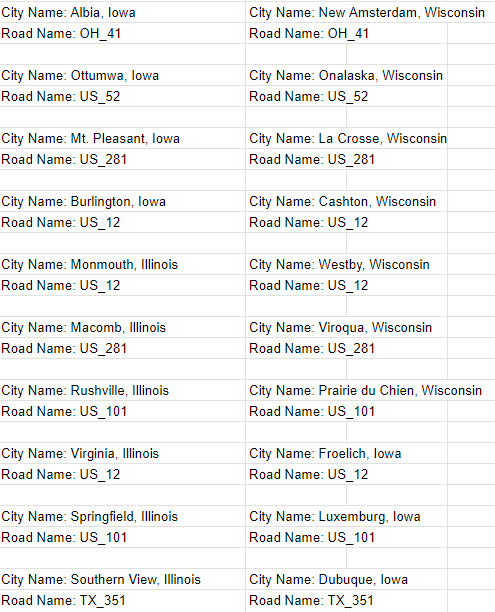

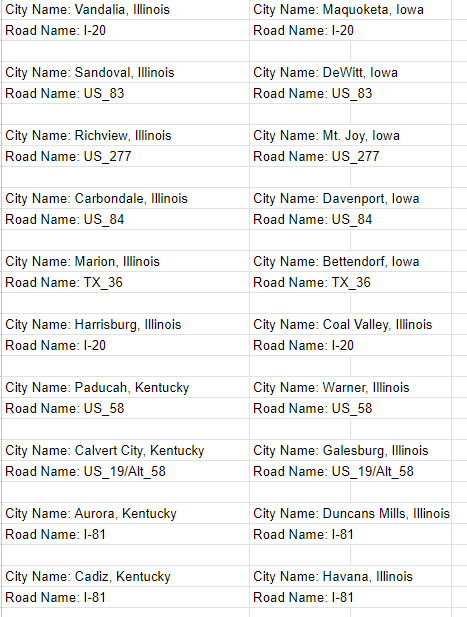

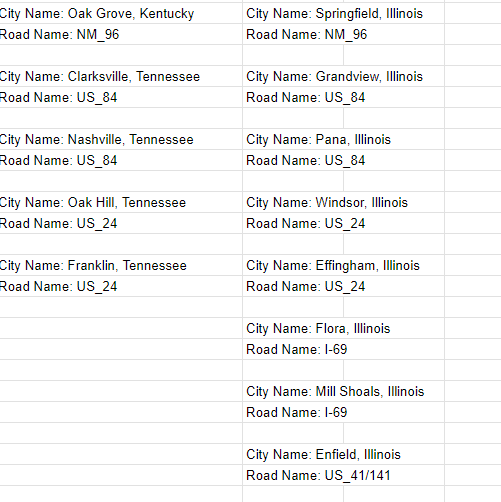

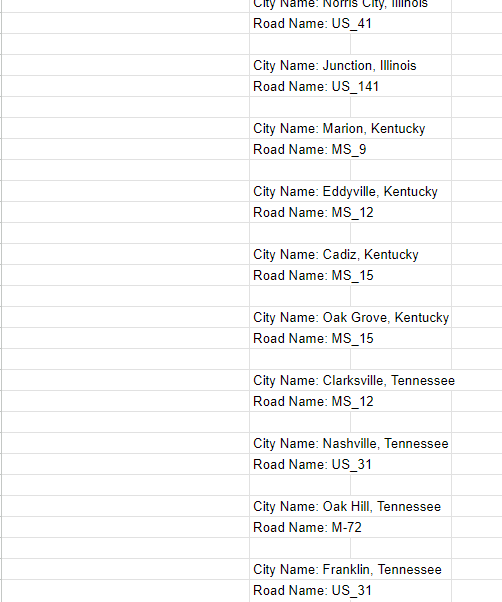

Time is shorter than distance!